# ERA5-Land fluxes


We use ERA5-Land (0001_l5) surface fluxes for 2020. In this notebook, the metview module is used to explore the data and to select the gridpoint closest to a given location (lat, lon), resulting in a timeseries per location. From this timeseries average diurnal and seasonal cycle of sensible and latent heat flux as well as their partition are calculated.  <br>

### Properties of ERA5-Land fluxes:
- temporal resolution: 1 h
- spatial resolution: ~9 km
- original unit of fluxes: Joule per $m^2$
- deaccumulated on hourly scale (only SH, LH is accumulated)


### Postprocessing of ERA5-Land fluxes:
- concatenate all months to one year (every month is stored in a separate file)
- select sshf and slhf
- find the nearest neighbor to a given location (lat, lon), e.g. station location
- divide by 3600 to get W/$m^2$ and multiply by (-1) for sign convention

In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import numpy as np
import glob
import metview as mv
import xarray as xr
execfile("utils.py")
%matplotlib inline

In [2]:
dir="/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_l5/2020/"
files=sorted(glob.glob(dir+"/*"))
files

['/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_l5/2020/fluxes_0001_ERA5L_202210',
 '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_l5/2020/fluxes_0001_ERA5L_202211',
 '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_l5/2020/fluxes_0001_ERA5L_202212']

## Explore file format with metview

In [6]:
tmp=mv.read(files[1])
tmp.describe() #overview

parameter,typeOfLevel,level,date,time,step,paramId,class,stream,type,experimentVersionNumber
slhf,surface,0,"20201101,20201102,...",0,"1,2,...",147,l5,oper,fc,0001
sshf,surface,0,"20201101,20201102,...",0,"1,2,...",146,l5,oper,fc,0001


In [7]:
#select a variable
sh=tmp["sshf"]
lh=tmp["slhf"]
sh.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,sshf,surface,0,20201101,0,0-1,fc,reduced_gg
1,ecmf,sshf,surface,0,20201101,0,1-2,fc,reduced_gg
2,ecmf,sshf,surface,0,20201101,0,2-3,fc,reduced_gg
3,ecmf,sshf,surface,0,20201101,0,3-4,fc,reduced_gg
4,ecmf,sshf,surface,0,20201101,0,4-5,fc,reduced_gg
...,...,...,...,...,...,...,...,...,...
715,ecmf,sshf,surface,0,20201130,0,19-20,fc,reduced_gg
716,ecmf,sshf,surface,0,20201130,0,20-21,fc,reduced_gg
717,ecmf,sshf,surface,0,20201130,0,21-22,fc,reduced_gg


In [8]:
#select a timestep
sh.select(step=1)[::].ls() # 0utc

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,sshf,surface,0,20201101,0,0-1,fc,reduced_gg
1,ecmf,sshf,surface,0,20201102,0,0-1,fc,reduced_gg
2,ecmf,sshf,surface,0,20201103,0,0-1,fc,reduced_gg
3,ecmf,sshf,surface,0,20201104,0,0-1,fc,reduced_gg
4,ecmf,sshf,surface,0,20201105,0,0-1,fc,reduced_gg
5,ecmf,sshf,surface,0,20201106,0,0-1,fc,reduced_gg
6,ecmf,sshf,surface,0,20201107,0,0-1,fc,reduced_gg
7,ecmf,sshf,surface,0,20201108,0,0-1,fc,reduced_gg
8,ecmf,sshf,surface,0,20201109,0,0-1,fc,reduced_gg


## Plot fluxes globally

In [11]:
#define mv shade
mf_shade = mv.mcont(
    legend="on",
    contour="on",
    contour_min_level=-400,
    contour_max_level=800,  
    contour_label="on",
    contour_shade="on",
    contour_shade_method="area_fill",
    contour_shade_max_level_colour="red",
    contour_shade_min_level_colour="sky",
    contour_shade_colour_direction="clockwise",
)

In [ ]:
sh = sh/(3600*-1)
mv.plot_maps(sh.select(date = 20200101, time = 600, step = 6),mf_shade)

## Inspect for one month

In [14]:
tmp=mv.read(files[0])
sh=tmp["sshf"]
lh=tmp["slhf"]

In [21]:
coord=[50,10]
sh_coord=np.array(sh.nearest_gridpoint(coord))/3600*-1
lh_coord=np.array(lh.nearest_gridpoint(coord))/3600*-1

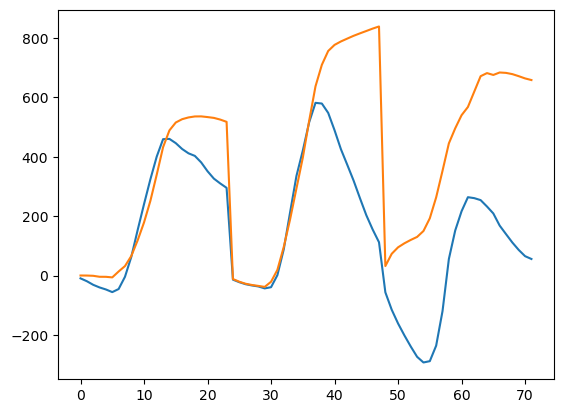

In [22]:
plt.plot(sh_coord[0:72]) #first 3 days
plt.plot(lh_coord[0:72])

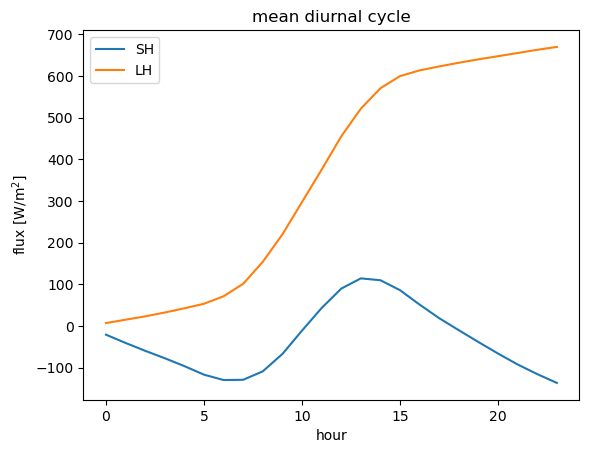

In [23]:
plt.plot(mean_diurnal_cycle(sh_coord),label="SH")
plt.plot(mean_diurnal_cycle(lh_coord),label="LH")
plt.xlabel("hour")
plt.ylabel(r"flux [W/m$^2$]")
plt.title("mean diurnal cycle")
plt.legend()

(LH accumulated, SH not)

## Prepare data for one year (timeseries)

In [ ]:
#TODO: adapt when full data available

In [7]:
#concatenate all months (to one year, 2020)
sh=mv.Fieldset() #allocate
lh=mv.Fieldset()
monlen=[31,29,31,30,31,30,31,31,30,31,30,31] #days per month (2020) 
for i in range(12):
    tmp=mv.read(files[i]) #read model per month
    sh_tmp=tmp["sshf"]
    lh_tmp=tmp["slhf"]
    sh.append(sh_tmp[:monlen[i]*26]) #26 because of the deacc values
    lh.append(lh_tmp[:monlen[i]*26]) 

In [8]:
#find nearest gridpoint
coords=[50,10]
sh_mod_coord=np.array(sh.nearest_gridpoint(coords))/3600*-1
sh_mod_coord=sh_mod_coord[sh_mod_coord!=0] #remove the artificial zeros

In [9]:
lh_mod_coord=np.array(lh.nearest_gridpoint(coords))/3600*-1
lh_mod_coord=lh_mod_coord[lh_mod_coord!=0] #remove the artificial zeros

dimension: (8784,)
#measurements (theoretically): 8784


Text(0.5, 0, 'index')

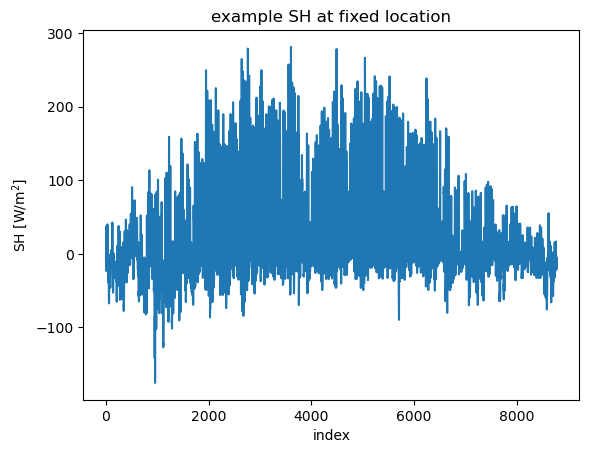

In [10]:
#check dimension
print("dimension: " + str(np.shape(sh_mod_coord)))
print("#measurements (theoretically): " + str(24*366))
#plot example
plt.plot(sh_mod_coord)
plt.title("example SH at fixed location")
plt.ylabel(r"SH [W/m$^2$]")
plt.xlabel("index")

## Average seasonal and diurnal cycle

In [22]:
sh_diurnal_cycle=mean_diurnal_cycle(sh_mod_coord[18:]) #offset: 24-6=18 (because of deaccumulation, see notebook on timelag for more details)
sh_seasonal_cycle=mean_seasonal_cycle(sh_mod_coord)
lh_diurnal_cycle=mean_diurnal_cycle(lh_mod_coord[18:]) #offset: 24-6=18 (because of deaccumulation, see notebook on timelag for more details)
lh_seasonal_cycle=mean_seasonal_cycle(lh_mod_coord)

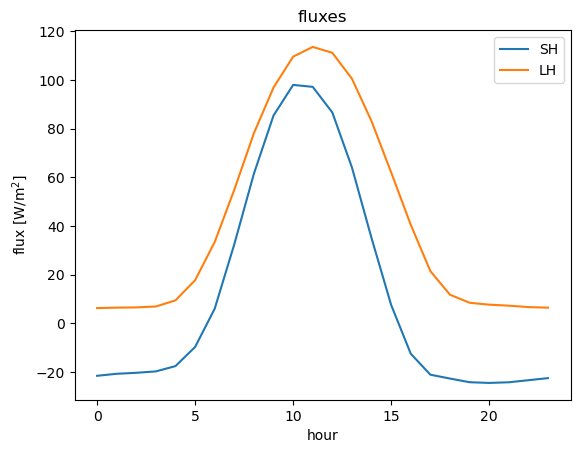

In [23]:
plt.plot(sh_diurnal_cycle,label="SH")
plt.plot(lh_diurnal_cycle,label="LH")
plt.xlabel("hour")
plt.ylabel(r"flux [W/m$^2$]")
plt.title("fluxes")
plt.legend()

Text(0.5, 0, 'hour')

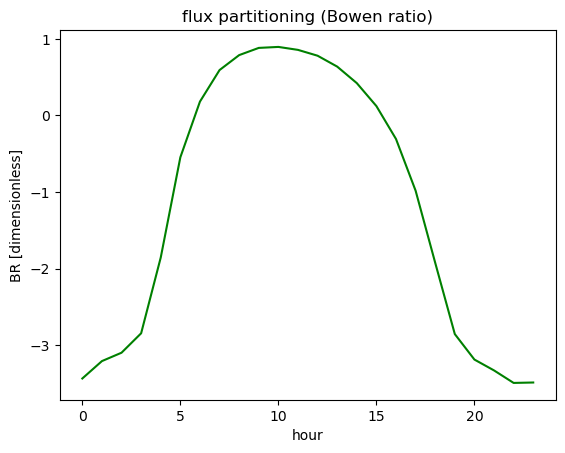

In [24]:
plt.plot(sh_diurnal_cycle/lh_diurnal_cycle,label="BR (partitioning)",color="green")
plt.title("flux partitioning (Bowen ratio)")
plt.ylabel("BR [dimensionless]")
plt.xlabel("hour")

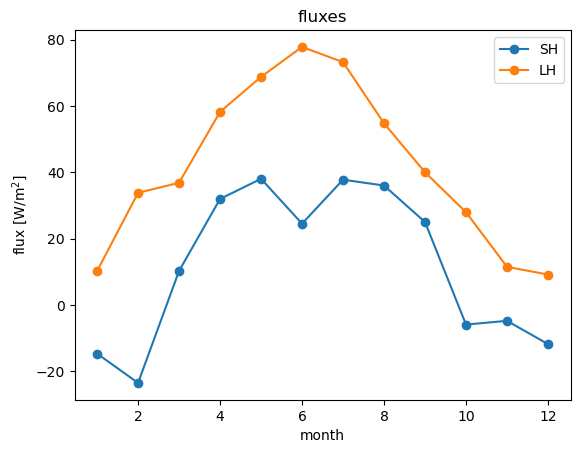

In [25]:
maxis=np.linspace(1,12,12)
plt.plot(maxis,sh_seasonal_cycle,"-o",label="SH")
plt.plot(maxis,lh_seasonal_cycle,"-o",label="LH")
plt.xlabel("month")
plt.ylabel(r"flux [W/m$^2$]")
plt.title("fluxes")
plt.legend()

Text(0.5, 0, 'motnh')

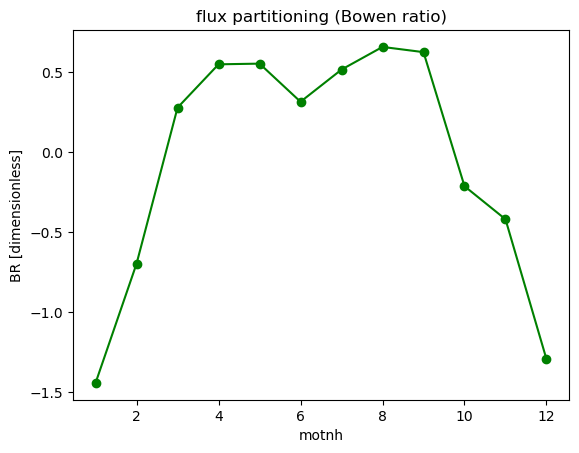

In [26]:
plt.plot(maxis,sh_seasonal_cycle/lh_seasonal_cycle,"-o",label="BR (partitioning)",color="green")
plt.title("flux partitioning (Bowen ratio)")
plt.ylabel("BR [dimensionless]")
plt.xlabel("motnh")

In [16]:
sh_mat=mean_seasonal_diurnal_cycle(sh_mod_coord)
lh_mat=mean_seasonal_diurnal_cycle(lh_mod_coord)
br_mat=mean_seasonal_diurnal_cycle(sh_mod_coord/lh_mod_coord)

Text(0.5, 1.0, '  LH: average seasonal and diurnal cycle   [$W/m^2$]')

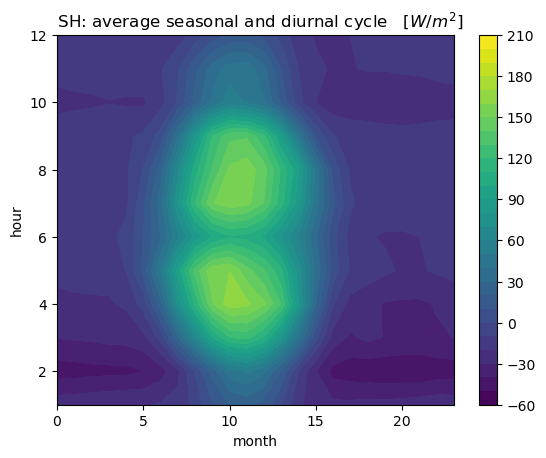

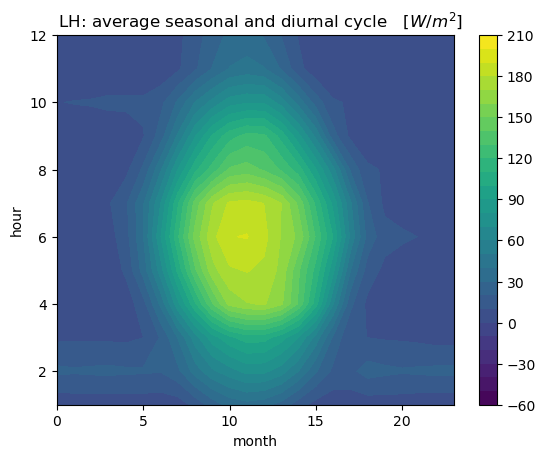

In [17]:
maxis=np.linspace(1,12,12)
haxis=np.linspace(0,23,24)

fig,ax = plt.subplots()
cf=ax.contourf(haxis,maxis,sh_mat,levels=np.linspace(-60,210,28))
cbar = fig.colorbar(cf)
ax.axes.set_ylabel("hour")
ax.axes.set_xlabel("month")
ax.set_title(r"  SH: average seasonal and diurnal cycle   [$W/m^2$]")

fig,ax = plt.subplots()
cf=ax.contourf(haxis,maxis,lh_mat,levels=np.linspace(-60,210,28))
cbar = fig.colorbar(cf)
ax.axes.set_ylabel("hour")
ax.axes.set_xlabel("month")
ax.set_title(r"  LH: average seasonal and diurnal cycle   [$W/m^2$]")